# DonorsChoose

<p>
DonorsChoose.org receives hundreds of thousands of project proposals each year for classroom projects in need of funding. Right now, a large number of volunteers is needed to manually screen each submission before it's approved to be posted on the DonorsChoose.org website.
</p>
<p>
    Next year, DonorsChoose.org expects to receive close to 500,000 project proposals. As a result, there are three main problems they need to solve:
<ul>
<li>
    How to scale current manual processes and resources to screen 500,000 projects so that they can be posted as quickly and as efficiently as possible</li>
    <li>How to increase the consistency of project vetting across different volunteers to improve the experience for teachers</li>
    <li>How to focus volunteer time on the applications that need the most assistance</li>
    </ul>
</p>    
<p>
The goal of the competition is to predict whether or not a DonorsChoose.org project proposal submitted by a teacher will be approved, using the text of project descriptions as well as additional metadata about the project, teacher, and school. DonorsChoose.org can then use this information to identify projects most likely to need further review before approval.
</p>

## About the DonorsChoose Data Set

The `train.csv` data set provided by DonorsChoose contains the following features:

Feature | Description 
----------|---------------
**`project_id`** | A unique identifier for the proposed project. **Example:** `p036502`   
**`project_title`**    | Title of the project. **Examples:**<br><ul><li><code>Art Will Make You Happy!</code></li><li><code>First Grade Fun</code></li></ul> 
**`project_grade_category`** | Grade level of students for which the project is targeted. One of the following enumerated values: <br/><ul><li><code>Grades PreK-2</code></li><li><code>Grades 3-5</code></li><li><code>Grades 6-8</code></li><li><code>Grades 9-12</code></li></ul>  
 **`project_subject_categories`** | One or more (comma-separated) subject categories for the project from the following enumerated list of values:  <br/><ul><li><code>Applied Learning</code></li><li><code>Care &amp; Hunger</code></li><li><code>Health &amp; Sports</code></li><li><code>History &amp; Civics</code></li><li><code>Literacy &amp; Language</code></li><li><code>Math &amp; Science</code></li><li><code>Music &amp; The Arts</code></li><li><code>Special Needs</code></li><li><code>Warmth</code></li></ul><br/> **Examples:** <br/><ul><li><code>Music &amp; The Arts</code></li><li><code>Literacy &amp; Language, Math &amp; Science</code></li>  
  **`school_state`** | State where school is located ([Two-letter U.S. postal code](https://en.wikipedia.org/wiki/List_of_U.S._state_abbreviations#Postal_codes)). **Example:** `WY`
**`project_subject_subcategories`** | One or more (comma-separated) subject subcategories for the project. **Examples:** <br/><ul><li><code>Literacy</code></li><li><code>Literature &amp; Writing, Social Sciences</code></li></ul> 
**`project_resource_summary`** | An explanation of the resources needed for the project. **Example:** <br/><ul><li><code>My students need hands on literacy materials to manage sensory needs!</code</li></ul> 
**`project_essay_1`**    | First application essay<sup>*</sup>  
**`project_essay_2`**    | Second application essay<sup>*</sup> 
**`project_essay_3`**    | Third application essay<sup>*</sup> 
**`project_essay_4`**    | Fourth application essay<sup>*</sup> 
**`project_submitted_datetime`** | Datetime when project application was submitted. **Example:** `2016-04-28 12:43:56.245`   
**`teacher_id`** | A unique identifier for the teacher of the proposed project. **Example:** `bdf8baa8fedef6bfeec7ae4ff1c15c56`  
**`teacher_prefix`** | Teacher's title. One of the following enumerated values: <br/><ul><li><code>nan</code></li><li><code>Dr.</code></li><li><code>Mr.</code></li><li><code>Mrs.</code></li><li><code>Ms.</code></li><li><code>Teacher.</code></li></ul>  
**`teacher_number_of_previously_posted_projects`** | Number of project applications previously submitted by the same teacher. **Example:** `2` 

<sup>*</sup> See the section <b>Notes on the Essay Data</b> for more details about these features.

Additionally, the `resources.csv` data set provides more data about the resources required for each project. Each line in this file represents a resource required by a project:

Feature | Description 
----------|---------------
**`id`** | A `project_id` value from the `train.csv` file.  **Example:** `p036502`   
**`description`** | Desciption of the resource. **Example:** `Tenor Saxophone Reeds, Box of 25`   
**`quantity`** | Quantity of the resource required. **Example:** `3`   
**`price`** | Price of the resource required. **Example:** `9.95`   

**Note:** Many projects require multiple resources. The `id` value corresponds to a `project_id` in train.csv, so you use it as a key to retrieve all resources needed for a project:

The data set contains the following label (the value you will attempt to predict):

Label | Description
----------|---------------
`project_is_approved` | A binary flag indicating whether DonorsChoose approved the project. A value of `0` indicates the project was not approved, and a value of `1` indicates the project was approved.

### Notes on the Essay Data

<ul>
Prior to May 17, 2016, the prompts for the essays were as follows:
<li>__project_essay_1:__ "Introduce us to your classroom"</li>
<li>__project_essay_2:__ "Tell us more about your students"</li>
<li>__project_essay_3:__ "Describe how your students will use the materials you're requesting"</li>
<li>__project_essay_3:__ "Close by sharing why your project will make a difference"</li>
</ul>


<ul>
Starting on May 17, 2016, the number of essays was reduced from 4 to 2, and the prompts for the first 2 essays were changed to the following:<br>
<li>__project_essay_1:__ "Describe your students: What makes your students special? Specific details about their background, your neighborhood, and your school are all helpful."</li>
<li>__project_essay_2:__ "About your project: How will these materials make a difference in your students' learning and improve their school lives?"</li>
<br>For all projects with project_submitted_datetime of 2016-05-17 and later, the values of project_essay_3 and project_essay_4 will be NaN.
</ul>


In [0]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [0]:
%matplotlib inline
import warnings
warnings.filterwarnings("ignore")

import sqlite3
import pandas as pd
import numpy as np
import nltk
import string
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.feature_extraction.text import TfidfVectorizer

from sklearn.feature_extraction.text import CountVectorizer
from sklearn.metrics import confusion_matrix
from sklearn import metrics
from sklearn.metrics import roc_curve, auc
from nltk.stem.porter import PorterStemmer

import re
# Tutorial about Python regular expressions: https://pymotw.com/2/re/
import string
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer
from nltk.stem.wordnet import WordNetLemmatizer

from gensim.models import Word2Vec
from gensim.models import KeyedVectors
import pickle

from tqdm import tqdm
import os

!pip install chart_studio

import chart_studio.plotly as plotly
import plotly.offline as offline
import plotly.graph_objs as go
offline.init_notebook_mode()
from collections import Counter

## 1.1 Reading Data

In [0]:
project_data = pd.read_csv('/content/drive/My Drive/Mass3/Assignments_DonorsChoose_2018/train_data.csv')
resource_data = pd.read_csv('/content/drive/My Drive/Mass3/Assignments_DonorsChoose_2018/resources.csv')

In [0]:
print("Number of data points in train data", project_data.shape)
print('-'*50)
print("The attributes of data :", project_data.columns.values)

Number of data points in train data (109248, 17)
--------------------------------------------------
The attributes of data : ['Unnamed: 0' 'id' 'teacher_id' 'teacher_prefix' 'school_state'
 'project_submitted_datetime' 'project_grade_category'
 'project_subject_categories' 'project_subject_subcategories'
 'project_title' 'project_essay_1' 'project_essay_2' 'project_essay_3'
 'project_essay_4' 'project_resource_summary'
 'teacher_number_of_previously_posted_projects' 'project_is_approved']


In [0]:
print("Number of data points in train data", resource_data.shape)
print(resource_data.columns.values)
resource_data.head(2)

Number of data points in train data (1541272, 4)
['id' 'description' 'quantity' 'price']


id                                        description  quantity   price
0  p233245  LC652 - Lakeshore Double-Space Mobile Drying Rack         1  149.00
1  p069063        Bouncy Bands for Desks (Blue support pipes)         3   14.95

## 1.2 preprocessing of `project_subject_categories`

In [0]:
catogories = list(project_data['project_subject_categories'].values)
# remove special characters from list of strings python: https://stackoverflow.com/a/47301924/4084039

# https://www.geeksforgeeks.org/removing-stop-words-nltk-python/
# https://stackoverflow.com/questions/23669024/how-to-strip-a-specific-word-from-a-string
# https://stackoverflow.com/questions/8270092/remove-all-whitespace-in-a-string-in-python
cat_list = []
for i in catogories:
    temp = ""
    # consider we have text like this "Math & Science, Warmth, Care & Hunger"
    for j in i.split(','): # it will split it in three parts ["Math & Science", "Warmth", "Care & Hunger"]
        if 'The' in j.split(): # this will split each of the catogory based on space "Math & Science"=> "Math","&", "Science"
            j=j.replace('The','') # if we have the words "The" we are going to replace it with ''(i.e removing 'The')
        j = j.replace(' ','') # we are placeing all the ' '(space) with ''(empty) ex:"Math & Science"=>"Math&Science"
        temp+=j.strip()+" " #" abc ".strip() will return "abc", remove the trailing spaces
        temp = temp.replace('&','_') # we are replacing the & value into 
    cat_list.append(temp.strip())
    
project_data['clean_categories'] = cat_list
project_data.drop(['project_subject_categories'], axis=1, inplace=True)

from collections import Counter
my_counter = Counter()
for word in project_data['clean_categories'].values:
    my_counter.update(word.split())

cat_dict = dict(my_counter)
sorted_cat_dict = dict(sorted(cat_dict.items(), key=lambda kv: kv[1]))


## 1.3 preprocessing of `project_subject_subcategories`

In [0]:
sub_catogories = list(project_data['project_subject_subcategories'].values)
# remove special characters from list of strings python: https://stackoverflow.com/a/47301924/4084039

# https://www.geeksforgeeks.org/removing-stop-words-nltk-python/
# https://stackoverflow.com/questions/23669024/how-to-strip-a-specific-word-from-a-string
# https://stackoverflow.com/questions/8270092/remove-all-whitespace-in-a-string-in-python

sub_cat_list = []
for i in sub_catogories:
    temp = ""
    # consider we have text like this "Math & Science, Warmth, Care & Hunger"
    for j in i.split(','): # it will split it in three parts ["Math & Science", "Warmth", "Care & Hunger"]
        if 'The' in j.split(): # this will split each of the catogory based on space "Math & Science"=> "Math","&", "Science"
            j=j.replace('The','') # if we have the words "The" we are going to replace it with ''(i.e removing 'The')
        j = j.replace(' ','') # we are placeing all the ' '(space) with ''(empty) ex:"Math & Science"=>"Math&Science"
        temp +=j.strip()+" "#" abc ".strip() will return "abc", remove the trailing spaces
        temp = temp.replace('&','_')
    sub_cat_list.append(temp.strip())

project_data['clean_subcategories'] = sub_cat_list
project_data.drop(['project_subject_subcategories'], axis=1, inplace=True)

# count of all the words in corpus python: https://stackoverflow.com/a/22898595/4084039
my_counter = Counter()
for word in project_data['clean_subcategories'].values:
    my_counter.update(word.split())
    
sub_cat_dict = dict(my_counter)
sorted_sub_cat_dict = dict(sorted(sub_cat_dict.items(), key=lambda kv: kv[1]))

## 1.3 Text preprocessing

In [0]:
# merge two column text dataframe: 
project_data["essay"] = project_data["project_essay_1"].map(str) +\
                        project_data["project_essay_2"].map(str) + \
                        project_data["project_essay_3"].map(str) + \
                        project_data["project_essay_4"].map(str)

In [0]:
project_data.head(2)

Unnamed: 0  ...                                              essay
0      160221  ...  My students are English learners that are work...
1      140945  ...  Our students arrive to our school eager to lea...

[2 rows x 18 columns]

In [0]:
#### 1.4.2.3 Using Pretrained Models: TFIDF weighted W2V

In [0]:
# printing some random reviews
print(project_data['essay'].values[0])
print("="*50)
print(project_data['essay'].values[150])
print("="*50)
print(project_data['essay'].values[1000])
print("="*50)
print(project_data['essay'].values[20000])
print("="*50)
print(project_data['essay'].values[99999])
print("="*50)

My students are English learners that are working on English as their second or third languages. We are a melting pot of refugees, immigrants, and native-born Americans bringing the gift of language to our school. \r\n\r\n We have over 24 languages represented in our English Learner program with students at every level of mastery.  We also have over 40 countries represented with the families within our school.  Each student brings a wealth of knowledge and experiences to us that open our eyes to new cultures, beliefs, and respect.\"The limits of your language are the limits of your world.\"-Ludwig Wittgenstein  Our English learner's have a strong support system at home that begs for more resources.  Many times our parents are learning to read and speak English along side of their children.  Sometimes this creates barriers for parents to be able to help their child learn phonetics, letter recognition, and other reading skills.\r\n\r\nBy providing these dvd's and players, students are ab

In [0]:
# https://stackoverflow.com/a/47091490/4084039
import re

def decontracted(phrase):
    # specific
    phrase = re.sub(r"won't", "will not", phrase)
    phrase = re.sub(r"can\'t", "can not", phrase)

    # general
    phrase = re.sub(r"n\'t", " not", phrase)
    phrase = re.sub(r"\'re", " are", phrase)
    phrase = re.sub(r"\'s", " is", phrase)
    phrase = re.sub(r"\'d", " would", phrase)
    phrase = re.sub(r"\'ll", " will", phrase)
    phrase = re.sub(r"\'t", " not", phrase)
    phrase = re.sub(r"\'ve", " have", phrase)
    phrase = re.sub(r"\'m", " am", phrase)
    return phrase

In [0]:
sent = decontracted(project_data['essay'].values[20000])
print(sent)
print("="*50)

My kindergarten students have varied disabilities ranging from speech and language delays, cognitive delays, gross/fine motor delays, to autism. They are eager beavers and always strive to work their hardest working past their limitations. \r\n\r\nThe materials we have are the ones I seek out for my students. I teach in a Title I school where most of the students receive free or reduced price lunch.  Despite their disabilities and limitations, my students love coming to school and come eager to learn and explore.Have you ever felt like you had ants in your pants and you needed to groove and move as you were in a meeting? This is how my kids feel all the time. The want to be able to move as they learn or so they say.Wobble chairs are the answer and I love then because they develop their core, which enhances gross motor and in Turn fine motor skills. \r\nThey also want to learn through games, my kids do not want to sit and do worksheets. They want to learn to count by jumping and playing

In [0]:
# \r \n \t remove from string python: http://texthandler.com/info/remove-line-breaks-python/
sent = sent.replace('\\r', ' ')
sent = sent.replace('\\"', ' ')
sent = sent.replace('\\n', ' ')
print(sent)

My kindergarten students have varied disabilities ranging from speech and language delays, cognitive delays, gross/fine motor delays, to autism. They are eager beavers and always strive to work their hardest working past their limitations.     The materials we have are the ones I seek out for my students. I teach in a Title I school where most of the students receive free or reduced price lunch.  Despite their disabilities and limitations, my students love coming to school and come eager to learn and explore.Have you ever felt like you had ants in your pants and you needed to groove and move as you were in a meeting? This is how my kids feel all the time. The want to be able to move as they learn or so they say.Wobble chairs are the answer and I love then because they develop their core, which enhances gross motor and in Turn fine motor skills.   They also want to learn through games, my kids do not want to sit and do worksheets. They want to learn to count by jumping and playing. Phys

In [0]:
#remove spacial character: https://stackoverflow.com/a/5843547/4084039
sent = re.sub('[^A-Za-z0-9]+', ' ', sent)
print(sent)

My kindergarten students have varied disabilities ranging from speech and language delays cognitive delays gross fine motor delays to autism They are eager beavers and always strive to work their hardest working past their limitations The materials we have are the ones I seek out for my students I teach in a Title I school where most of the students receive free or reduced price lunch Despite their disabilities and limitations my students love coming to school and come eager to learn and explore Have you ever felt like you had ants in your pants and you needed to groove and move as you were in a meeting This is how my kids feel all the time The want to be able to move as they learn or so they say Wobble chairs are the answer and I love then because they develop their core which enhances gross motor and in Turn fine motor skills They also want to learn through games my kids do not want to sit and do worksheets They want to learn to count by jumping and playing Physical engagement is the

In [0]:
# https://gist.github.com/sebleier/554280
# we are removing the words from the stop words list: 'no', 'nor', 'not'
stopwords= ['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're", "you've",\
            "you'll", "you'd", 'your', 'yours', 'yourself', 'yourselves', 'he', 'him', 'his', 'himself', \
            'she', "she's", 'her', 'hers', 'herself', 'it', "it's", 'its', 'itself', 'they', 'them', 'their',\
            'theirs', 'themselves', 'what', 'which', 'who', 'whom', 'this', 'that', "that'll", 'these', 'those', \
            'am', 'is', 'are', 'was', 'were', 'be', 'been', 'being', 'have', 'has', 'had', 'having', 'do', 'does', \
            'did', 'doing', 'a', 'an', 'the', 'and', 'but', 'if', 'or', 'because', 'as', 'until', 'while', 'of', \
            'at', 'by', 'for', 'with', 'about', 'against', 'between', 'into', 'through', 'during', 'before', 'after',\
            'above', 'below', 'to', 'from', 'up', 'down', 'in', 'out', 'on', 'off', 'over', 'under', 'again', 'further',\
            'then', 'once', 'here', 'there', 'when', 'where', 'why', 'how', 'all', 'any', 'both', 'each', 'few', 'more',\
            'most', 'other', 'some', 'such', 'only', 'own', 'same', 'so', 'than', 'too', 'very', \
            's', 't', 'can', 'will', 'just', 'don', "don't", 'should', "should've", 'now', 'd', 'll', 'm', 'o', 're', \
            've', 'y', 'ain', 'aren', "aren't", 'couldn', "couldn't", 'didn', "didn't", 'doesn', "doesn't", 'hadn',\
            "hadn't", 'hasn', "hasn't", 'haven', "haven't", 'isn', "isn't", 'ma', 'mightn', "mightn't", 'mustn',\
            "mustn't", 'needn', "needn't", 'shan', "shan't", 'shouldn', "shouldn't", 'wasn', "wasn't", 'weren', "weren't", \
            'won', "won't", 'wouldn', "wouldn't"]

In [0]:
# Combining all the above stundents 
from tqdm import tqdm
preprocessed_essays = []
# tqdm is for printing the status bar
for sentance in tqdm(project_data['essay'].values):
    sent = decontracted(sentance)
    sent = sent.replace('\\r', ' ')
    sent = sent.replace('\\"', ' ')
    sent = sent.replace('\\n', ' ')
    sent = re.sub('[^A-Za-z0-9]+', ' ', sent)
    # https://gist.github.com/sebleier/554280
    sent = ' '.join(e for e in sent.split() if e not in stopwords)
    preprocessed_essays.append(sent.lower().strip())

100%|██████████| 109248/109248 [01:03<00:00, 1720.16it/s]


In [0]:
# after preprocesing
preprocessed_essays[20000]

'my kindergarten students varied disabilities ranging speech language delays cognitive delays gross fine motor delays autism they eager beavers always strive work hardest working past limitations the materials ones i seek students i teach title i school students receive free reduced price lunch despite disabilities limitations students love coming school come eager learn explore have ever felt like ants pants needed groove move meeting this kids feel time the want able move learn say wobble chairs answer i love develop core enhances gross motor turn fine motor skills they also want learn games kids not want sit worksheets they want learn count jumping playing physical engagement key success the number toss color shape mats make happen my students forget work fun 6 year old deserves nannan'

In [0]:
project_data["essays"] = preprocessed_essays

project_data.drop(['essay'], axis=1, inplace=True)
project_data.drop(['project_essay_1'], axis=1, inplace=True)
project_data.drop(['project_essay_2'], axis=1, inplace=True)
project_data.drop(['project_essay_3'], axis=1, inplace=True)
project_data.drop(['project_essay_4'], axis=1, inplace=True)

In [0]:
project_data.head(2)

Unnamed: 0  ...                                             essays
0      160221  ...  my students english learners working english s...
1      140945  ...  our students arrive school eager learn they po...

[2 rows x 14 columns]

<h2><font color='red'> 1.4 Preprocessing of `project_title`</font></h2>

In [0]:
# similarly you can preprocess the titles also

In [0]:
# Combining all the above statemennts 
preprocessed_title = []
# tqdm is for printing the status bar
for sentance in tqdm(project_data['project_title'].values):
    sent = decontracted(sentance)
    sent = sent.replace('\\r', ' ')
    sent = sent.replace('\\"', ' ')
    sent = sent.replace('\\n', ' ')
    sent = re.sub('[^A-Za-z0-9]+', ' ', sent)
    # https://gist.github.com/sebleier/554280
    sent = ' '.join(e for e in sent.split() if e not in stopwords)
    preprocessed_title.append(sent.lower().strip())

100%|██████████| 109248/109248 [00:02<00:00, 41383.01it/s]


In [0]:
# after preprocesing
preprocessed_title[0:4]

['educational support english learners home',
 'wanted projector hungry learners',
 'soccer equipment awesome middle school students',
 'techie kindergarteners']

In [0]:
project_data["project_title"] = preprocessed_title

In [0]:
project_data['project_grade_category']=project_data['project_grade_category'].replace('Grades PreK-2','Grades_PreK_2')
project_data['project_grade_category']=project_data['project_grade_category'].replace('Grades 3-5','Grades_3_5')
project_data['project_grade_category']=project_data['project_grade_category'].replace('Grades 6-8','Grades_6_8')
project_data['project_grade_category']=project_data['project_grade_category'].replace('Grades 9-12','Grades_9_12')

## 1.5 Preparing data for models

In [0]:
project_data.columns

Index(['Unnamed: 0', 'id', 'teacher_id', 'teacher_prefix', 'school_state',
       'project_submitted_datetime', 'project_grade_category', 'project_title',
       'project_resource_summary',
       'teacher_number_of_previously_posted_projects', 'project_is_approved',
       'clean_categories', 'clean_subcategories', 'essays'],
      dtype='object')

we are going to consider

       - school_state : categorical data
       - clean_categories : categorical data
       - clean_subcategories : categorical data
       - project_grade_category : categorical data
       - teacher_prefix : categorical data
       
       - project_title : text data
       - text : text data
       - project_resource_summary: text data (optinal)
       
       - quantity : numerical (optinal)
       - teacher_number_of_previously_posted_projects : numerical
       - price : numerical

### 1.5.1 Vectorizing Categorical data

- https://www.appliedaicourse.com/course/applied-ai-course-online/lessons/handling-categorical-and-numerical-features/

In [0]:
# we use count vectorizer to convert the values into one 
from sklearn.feature_extraction.text import CountVectorizer
vectorizer = CountVectorizer(vocabulary=list(sorted_cat_dict.keys()), lowercase=False, binary=True)
categories_one_hot = vectorizer.fit_transform(project_data['clean_categories'].values)
print(vectorizer.get_feature_names())
print("Shape of matrix after one hot encodig ",categories_one_hot.shape)

['Warmth', 'Care_Hunger', 'History_Civics', 'Music_Arts', 'AppliedLearning', 'SpecialNeeds', 'Health_Sports', 'Math_Science', 'Literacy_Language']
Shape of matrix after one hot encodig  (109248, 9)


In [0]:
# we use count vectorizer to convert the values into one 
vectorizer = CountVectorizer(vocabulary=list(sorted_sub_cat_dict.keys()), lowercase=False, binary=True)
sub_categories_one_hot = vectorizer.fit_transform(project_data['clean_subcategories'].values)
print(vectorizer.get_feature_names())
print("Shape of matrix after one hot encodig ",sub_categories_one_hot.shape)

['Economics', 'CommunityService', 'FinancialLiteracy', 'ParentInvolvement', 'Extracurricular', 'Civics_Government', 'ForeignLanguages', 'NutritionEducation', 'Warmth', 'Care_Hunger', 'SocialSciences', 'PerformingArts', 'CharacterEducation', 'TeamSports', 'Other', 'College_CareerPrep', 'Music', 'History_Geography', 'Health_LifeScience', 'EarlyDevelopment', 'ESL', 'Gym_Fitness', 'EnvironmentalScience', 'VisualArts', 'Health_Wellness', 'AppliedSciences', 'SpecialNeeds', 'Literature_Writing', 'Mathematics', 'Literacy']
Shape of matrix after one hot encodig  (109248, 30)


In [0]:
# you can do the similar thing with state, teacher_prefix and project_grade_category also

## State

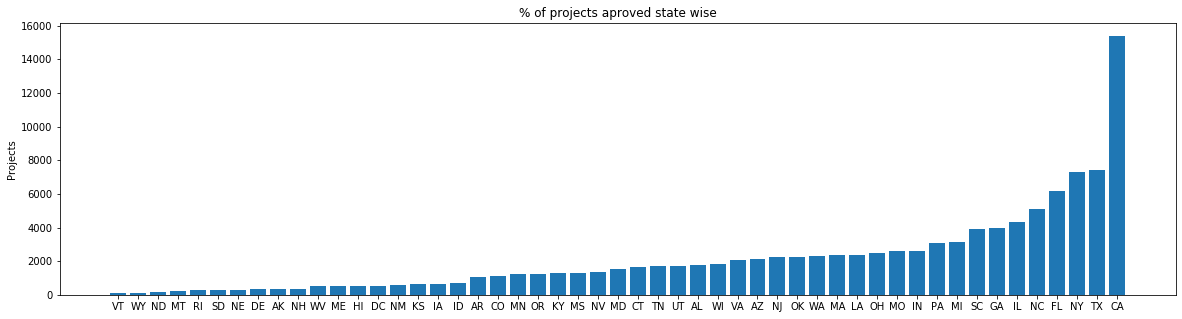

VT                   :        80
WY                   :        98
ND                   :       143
MT                   :       245
RI                   :       285
SD                   :       300
NE                   :       309
DE                   :       343
AK                   :       345
NH                   :       348
WV                   :       503
ME                   :       505
HI                   :       507
DC                   :       516
NM                   :       557
KS                   :       634
IA                   :       666
ID                   :       693
AR                   :      1049
CO                   :      1111
MN                   :      1208
OR                   :      1242
KY                   :      1304
MS                   :      1323
NV                   :      1367
MD                   :      1514
CT                   :      1663
TN                   :      1688
UT                   :      1731
AL                   :      1762
WI        

In [0]:
from collections import Counter
my_counter1 = Counter()
for word in project_data['school_state'].values:
    my_counter1.update(word.split())

state_dict = dict(my_counter1)
sorted_state_dict = dict(sorted(state_dict.items(), key=lambda kv: kv[1]))
ind1 = np.arange(len(sorted_state_dict))
plt.figure(figsize=(20,5))
p2 = plt.bar(ind1, list(sorted_state_dict.values()))
plt.ylabel('Projects')
plt.title('% of projects aproved state wise')
plt.xticks(ind1, list(sorted_state_dict.keys()))
plt.show()


for i, j in sorted_state_dict.items():
    print("{:20} :{:10}".format(i,j))

### State

In [0]:
vectorizer = CountVectorizer(vocabulary=list(sorted_state_dict.keys()), lowercase=False, binary=True)
vectorizer.fit(project_data['school_state'].values)
print(vectorizer.get_feature_names())


state_one_hot = vectorizer.transform(project_data['school_state'].values)
print("Shape of matrix after one hot encodig ",state_one_hot.shape)

['VT', 'WY', 'ND', 'MT', 'RI', 'SD', 'NE', 'DE', 'AK', 'NH', 'WV', 'ME', 'HI', 'DC', 'NM', 'KS', 'IA', 'ID', 'AR', 'CO', 'MN', 'OR', 'KY', 'MS', 'NV', 'MD', 'CT', 'TN', 'UT', 'AL', 'WI', 'VA', 'AZ', 'NJ', 'OK', 'WA', 'MA', 'LA', 'OH', 'MO', 'IN', 'PA', 'MI', 'SC', 'GA', 'IL', 'NC', 'FL', 'NY', 'TX', 'CA']
Shape of matrix after one hot encodig  (109248, 51)


### Teacher_prefix Dictionary

In [0]:
project_data['teacher_prefix']=project_data['teacher_prefix'].fillna(method='ffill')

In [0]:
project_data['teacher_prefix'][30368:30372]

30368    Mrs.
30369    Mrs.
30370     Ms.
30371     Ms.
Name: teacher_prefix, dtype: object

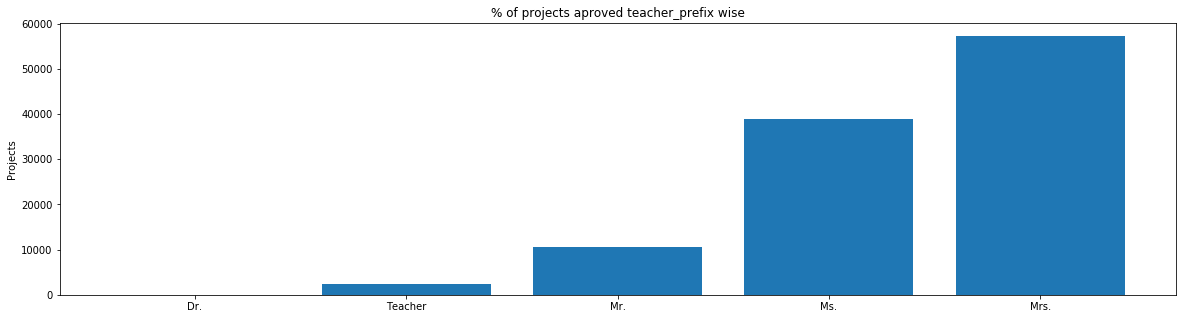

Dr.                  :        13
Teacher              :      2360
Mr.                  :     10648
Ms.                  :     38956
Mrs.                 :     57271


In [0]:
from collections import Counter
my_counter2 = Counter()
for word in project_data['teacher_prefix'].values:
    my_counter2.update(word.split())

prefix_dict = dict(my_counter2)
sorted_prefix_dict = dict(sorted(prefix_dict.items(), key=lambda kv: kv[1]))
ind2 = np.arange(len(sorted_prefix_dict))
plt.figure(figsize=(20,5))
p2 = plt.bar(ind2, list(sorted_prefix_dict.values()))
plt.ylabel('Projects')
plt.title('% of projects aproved teacher_prefix wise')
plt.xticks(ind2, list(sorted_prefix_dict.keys()))
plt.show()


for i, j in sorted_prefix_dict.items():
    print("{:20} :{:10}".format(i,j))

In [0]:
#Teacher_prefix

vectorizer = CountVectorizer(vocabulary=list(sorted_prefix_dict.keys()), lowercase=False, binary=True)
vectorizer.fit(project_data['teacher_prefix'].values)
print(vectorizer.get_feature_names())


teacher_prefix_one_hot = vectorizer.transform(project_data['teacher_prefix'].values)
print("Shape of matrix after one hot encodig ",teacher_prefix_one_hot.shape)

['Dr.', 'Teacher', 'Mr.', 'Ms.', 'Mrs.']
Shape of matrix after one hot encodig  (109248, 5)


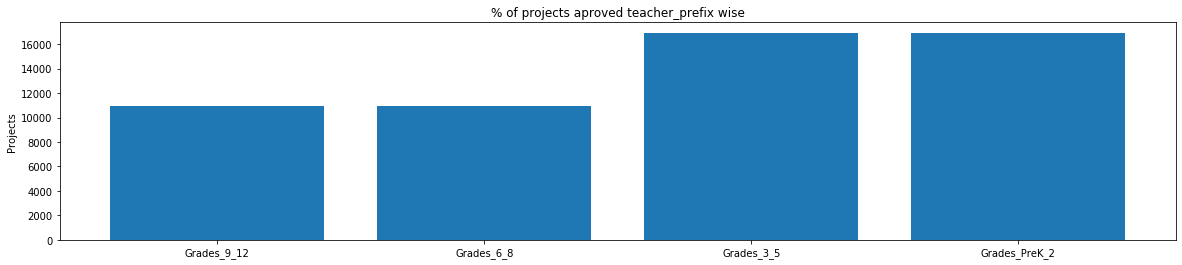

Grades_9_12          :     10963
Grades_6_8           :     10963
Grades_3_5           :     16923
Grades_PreK_2        :     16923


In [0]:
#project_grade_category Dictionary

#How_to_update_keys: https://www.geeksforgeeks.org/python-ways-to-change-keys-in-dictionary/


from collections import Counter
my_counter3 = Counter()
for word in project_data['project_grade_category'].values:
    my_counter3.update(word.split('_'))


grade_dict = dict(my_counter3)
sorted_grade_dict = dict(sorted(grade_dict.items(), key=lambda kv: kv[1]))
dict((sorted_grade_dict[key], value) for (key, value) in sorted_grade_dict.items())
updt_keys = ['Grades_9_12', 'Grades_6_8', 'Grades_3_5', 'Grades_PreK_2']
sorted_grade_dict = dict(zip(updt_keys, list(sorted_grade_dict.values())))
ind3 = np.arange(len(sorted_grade_dict))
plt.figure(figsize=(20,4))
p3 = plt.bar(ind3, list(sorted_grade_dict.values()))
plt.ylabel('Projects')
plt.title('% of projects aproved teacher_prefix wise')
plt.xticks(ind3, list(sorted_grade_dict.keys()))
plt.show()


for i, j in sorted_grade_dict.items():
    print("{:20} :{:10}".format(i,j))

In [0]:
#project_grade_category
vectorizer = CountVectorizer(vocabulary=list(sorted_grade_dict.keys()), lowercase=False, binary=True)
vectorizer.fit(project_data['project_grade_category'].values)
print(vectorizer.get_feature_names())


grade_cat_one_hot = vectorizer.transform(project_data['project_grade_category'].values)
print("Shape of matrix after one hot encoding ",grade_cat_one_hot.shape)

['Grades_9_12', 'Grades_6_8', 'Grades_3_5', 'Grades_PreK_2']
Shape of matrix after one hot encoding  (109248, 4)


### 1.5.2 Vectorizing Text data

#### 1.5.2.1 Bag of words

In [0]:
# We are considering only the words which appeared in at least 10 documents(rows or projects).
vectorizer = CountVectorizer(min_df=10)
text_bow = vectorizer.fit_transform(preprocessed_essays)
print("Shape of matrix after one hot encodig ",text_bow.shape)

Shape of matrix after one hot encodig  (109248, 16623)


In [0]:
# you can vectorize the title also 
# before you vectorize the title make sure you preprocess it
preprocessed_title = []
# tqdm is for printing the status bar
for sentance in tqdm(project_data['project_title'].values):
    sent = decontracted(sentance)
    sent = sent.replace('\\r', ' ')
    sent = sent.replace('\\"', ' ')
    sent = sent.replace('\\n', ' ')
    sent = re.sub('[^A-Za-z0-9]+', ' ', sent)
    # https://gist.github.com/sebleier/554280
    sent = ' '.join(e for e in sent.split() if e not in stopwords)
    preprocessed_title.append(sent.lower().strip())

100%|██████████| 109248/109248 [00:02<00:00, 45798.27it/s]


In [0]:
# Similarly you can vectorize for title also
vectorizer = CountVectorizer(min_df=10)
text_bow = vectorizer.fit_transform(preprocessed_title)
print("Shape of matrix after one hot encoding ",text_bow.shape)

Shape of matrix after one hot encoding  (109248, 3222)


#### 1.5.2.2 TFIDF vectorizer

In [0]:
from sklearn.feature_extraction.text import TfidfVectorizer
vectorizer = TfidfVectorizer(min_df=10)
text_tfidf = vectorizer.fit_transform(preprocessed_essays)
print("Shape of matrix after one hot encodig ",text_tfidf.shape)

Shape of matrix after one hot encodig  (109248, 16623)


#### 1.5.2.3 Using Pretrained Models: Avg W2V

In [0]:
'''
# Reading glove vectors in python: https://stackoverflow.com/a/38230349/4084039
def loadGloveModel(gloveFile):
    print ("Loading Glove Model")
    f = open(gloveFile,'r', encoding="utf8")
    model = {}
    for line in tqdm(f):
        splitLine = line.split()
        word = splitLine[0]
        embedding = np.array([float(val) for val in splitLine[1:]])
        model[word] = embedding
    print ("Done.",len(model)," words loaded!")
    return model
model = loadGloveModel('glove.42B.300d.txt')

# ============================
Output:
    
Loading Glove Model
1917495it [06:32, 4879.69it/s]
Done. 1917495  words loaded!

# ============================

words = []
for i in preproced_texts:
    words.extend(i.split(' '))

for i in preproced_titles:
    words.extend(i.split(' '))
print("all the words in the coupus", len(words))
words = set(words)
print("the unique words in the coupus", len(words))

inter_words = set(model.keys()).intersection(words)
print("The number of words that are present in both glove vectors and our coupus", \
      len(inter_words),"(",np.round(len(inter_words)/len(words)*100,3),"%)")

words_courpus = {}
words_glove = set(model.keys())
for i in words:
    if i in words_glove:
        words_courpus[i] = model[i]
print("word 2 vec length", len(words_courpus))


# stronging variables into pickle files python: http://www.jessicayung.com/how-to-use-pickle-to-save-and-load-variables-in-python/

import pickle
with open('glove_vectors', 'wb') as f:
    pickle.dump(words_courpus, f)


'''

'\n# Reading glove vectors in python: https://stackoverflow.com/a/38230349/4084039\ndef loadGloveModel(gloveFile):\n    print ("Loading Glove Model")\n    f = open(gloveFile,\'r\', encoding="utf8")\n    model = {}\n    for line in tqdm(f):\n        splitLine = line.split()\n        word = splitLine[0]\n        embedding = np.array([float(val) for val in splitLine[1:]])\n        model[word] = embedding\n    print ("Done.",len(model)," words loaded!")\n    return model\nmodel = loadGloveModel(\'glove.42B.300d.txt\')\n\n# ============================\nOutput:\n    \nLoading Glove Model\n1917495it [06:32, 4879.69it/s]\nDone. 1917495  words loaded!\n\n# ============================\n\nwords = []\nfor i in preproced_texts:\n    words.extend(i.split(\' \'))\n\nfor i in preproced_titles:\n    words.extend(i.split(\' \'))\nprint("all the words in the coupus", len(words))\nwords = set(words)\nprint("the unique words in the coupus", len(words))\n\ninter_words = set(model.keys()).intersection(word

In [0]:
# stronging variables into pickle files python: http://www.jessicayung.com/how-to-use-pickle-to-save-and-load-variables-in-python/
# make sure you have the glove_vectors file
with open('/content/drive/My Drive/Mass3/Assignments_DonorsChoose_2018/glove_vectors', 'rb') as f:
    model = pickle.load(f)
    glove_words =  set(model.keys())

In [0]:
# average Word2Vec
# compute average word2vec for each review.
avg_w2v_vectors = []; # the avg-w2v for each sentence/review is stored in this list
for sentence in tqdm(preprocessed_essays): # for each review/sentence
    vector = np.zeros(300) # as word vectors are of zero length
    cnt_words =0; # num of words with a valid vector in the sentence/review
    for word in sentence.split(): # for each word in a review/sentence
        if word in glove_words:
            vector += model[word]
            cnt_words += 1
    if cnt_words != 0:
        vector /= cnt_words
    avg_w2v_vectors.append(vector)

print(len(avg_w2v_vectors))
print(len(avg_w2v_vectors[0]))

100%|██████████| 109248/109248 [00:33<00:00, 3213.98it/s]

109248
300


#### 1.5.2.3 Using Pretrained Models: TFIDF weighted W2V

In [0]:
# S = ["abc def pqr", "def def def abc", "pqr pqr def"]
tfidf_model = TfidfVectorizer()
tfidf_model.fit(preprocessed_essays)
# we are converting a dictionary with word as a key, and the idf as a value
dictionary = dict(zip(tfidf_model.get_feature_names(), list(tfidf_model.idf_)))
tfidf_words = set(tfidf_model.get_feature_names())

In [0]:
# average Word2Vec
# compute average word2vec for each review.
tfidf_w2v_vectors = []; # the avg-w2v for each sentence/review is stored in this list
for sentence in tqdm(preprocessed_essays): # for each review/sentence
    vector = np.zeros(300) # as word vectors are of zero length
    tf_idf_weight =0; # num of words with a valid vector in the sentence/review
    for word in sentence.split(): # for each word in a review/sentence
        if (word in glove_words) and (word in tfidf_words):
            vec = model[word] # getting the vector for each word
            # here we are multiplying idf value(dictionary[word]) and the tf value((sentence.count(word)/len(sentence.split())))
            tf_idf = dictionary[word]*(sentence.count(word)/len(sentence.split())) # getting the tfidf value for each word
            vector += (vec * tf_idf) # calculating tfidf weighted w2v
            tf_idf_weight += tf_idf
    if tf_idf_weight != 0:
        vector /= tf_idf_weight
    tfidf_w2v_vectors.append(vector)

print(len(tfidf_w2v_vectors))
print(len(tfidf_w2v_vectors[0]))

100%|██████████| 109248/109248 [03:39<00:00, 498.84it/s]

109248
300


In [0]:
# Similarly you can vectorize for title also

### Using Pretrained Models: TFIDF weighted W2V on `project_title`

In [0]:
# S = ["abc def pqr", "def def def abc", "pqr pqr def"]
tfidf_model = TfidfVectorizer()
tfidf_model.fit(preprocessed_essays)
# we are converting a dictionary with word as a key, and the idf as a value
dictionary = dict(zip(tfidf_model.get_feature_names(), list(tfidf_model.idf_)))
tfidf_words = set(tfidf_model.get_feature_names())

In [0]:
# Similarly you can vectorize for title also

tfidf_w2v_vectors = []; # the avg-w2v for each sentence/review is stored in this list
for sentence in tqdm(preprocessed_title): # for each review/sentence
    vector = np.zeros(300) # as word vectors are of zero length
    tf_idf_weight =0; # num of words with a valid vector in the sentence/review
    for word in sentence.split(): # for each word in a review/sentence
        if (word in glove_words) and (word in tfidf_words):
            vec = model[word] # getting the vector for each word
            # here we are multiplying idf value(dictionary[word]) and the tf value((sentence.count(word)/len(sentence.split())))
            tf_idf = dictionary[word]*(sentence.count(word)/len(sentence.split())) # getting the tfidf value for each word
            vector += (vec * tf_idf) # calculating tfidf weighted w2v
            tf_idf_weight += tf_idf
    if tf_idf_weight != 0:
        vector /= tf_idf_weight
    tfidf_w2v_vectors.append(vector)

print(len(tfidf_w2v_vectors))
print(len(tfidf_w2v_vectors[0]))

100%|██████████| 109248/109248 [00:04<00:00, 25306.49it/s]

109248
300


In [0]:
# Conversion of a list to sparse matrix

from scipy.sparse import coo_matrix
tfidf_w2v_matrix=np.reshape(np.asarray(tfidf_w2v_vectors),(109248,300))
sparse_tfidf_w2v_matrix=coo_matrix(tfidf_w2v_matrix).tocsr()

print("Shape of matrix after one hot encoding ",sparse_tfidf_w2v_matrix.shape)

Shape of matrix after one hot encoding  (109248, 300)


### 1.5.3 Vectorizing Numerical features

In [0]:
price_data = resource_data.groupby('id').agg({'price':'sum', 'quantity':'sum'}).reset_index()
project_data = pd.merge(project_data, price_data, on='id', how='left')

In [0]:
# check this one: https://www.youtube.com/watch?v=0HOqOcln3Z4&t=530s
# standardization sklearn: https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.StandardScaler.html
from sklearn.preprocessing import StandardScaler

# price_standardized = standardScalar.fit(project_data['price'].values)
# this will rise the error
# ValueError: Expected 2D array, got 1D array instead: array=[725.05 213.03 329.   ... 399.   287.73   5.5 ].
# Reshape your data either using array.reshape(-1, 1)

price_scalar = StandardScaler()
price_scalar.fit(project_data['price'].values.reshape(-1,1)) # finding the mean and standard deviation of this data
print(f"Mean : {price_scalar.mean_[0]}, Standard deviation : {np.sqrt(price_scalar.var_[0])}")

# Now standardize the data with above maen and variance.
price_standardized = price_scalar.transform(project_data['price'].values.reshape(-1, 1))

Mean : 298.1193425966608, Standard deviation : 367.49634838483496


In [0]:
price_standardized

array([[-0.3905327 ],
       [ 0.00239637],
       [ 0.59519138],
       ...,
       [-0.15825829],
       [-0.61243967],
       [-0.51216657]])

### 1.5.4 Merging all the above features

- we need to merge all the numerical vectors i.e catogorical, text, numerical vectors

In [0]:
print(categories_one_hot.shape)
print(sub_categories_one_hot.shape)
print(text_bow.shape)
print(price_standardized.shape)

(109248, 9)
(109248, 30)
(109248, 3222)
(109248, 1)


In [0]:
# merge two sparse matrices: https://stackoverflow.com/a/19710648/4084039
from scipy.sparse import hstack
# with the same hstack function we are concatinating a sparse matrix and a dense matirx :)
X = hstack((categories_one_hot, sub_categories_one_hot, text_bow, price_standardized))
X.shape

(109248, 3262)

In [0]:
# please write all the code with proper documentation, and proper titles for each subsection
# when you plot any graph make sure you use 
    # a. Title, that describes your plot, this will be very helpful to the reader
    # b. Legends if needed
    # c. X-axis label
    # d. Y-axis label

__ Computing Sentiment Scores__

In [0]:
import nltk
nltk.download('vader_lexicon')
from nltk.sentiment.vader import SentimentIntensityAnalyzer

# import nltk
# nltk.download('vader_lexicon')

sid = SentimentIntensityAnalyzer()

for_sentiment = 'a person is a person no matter how small dr seuss i teach the smallest students with the biggest enthusiasm \
for learning my students learn in many different ways using all of our senses and multiple intelligences i use a wide range\
of techniques to help all my students succeed students in my class come from a variety of different backgrounds which makes\
for wonderful sharing of experiences and cultures including native americans our school is a caring community of successful \
learners which can be seen through collaborative student project based learning in and out of the classroom kindergarteners \
in my class love to work with hands on materials and have many different opportunities to practice a skill before it is\
mastered having the social skills to work cooperatively with friends is a crucial aspect of the kindergarten curriculum\
montana is the perfect place to learn about agriculture and nutrition my students love to role play in our pretend kitchen\
in the early childhood classroom i have had several kids ask me can we try cooking with real food i will take their idea \
and create common core cooking lessons where we learn important math and writing concepts while cooking delicious healthy \
food for snack time my students will have a grounded appreciation for the work that went into making the food and knowledge \
of where the ingredients came from as well as how it is healthy for their bodies this project would expand our learning of \
nutrition and agricultural cooking recipes by having us peel our own apples to make homemade applesauce make our own bread \
and mix up healthy plants from our classroom garden in the spring we will also create our own cookbooks to be printed and \
shared with families students will gain math and literature skills as well as a life long enjoyment for healthy cooking \
nannan'
ss = sid.polarity_scores(for_sentiment)

for k in ss:
    print('{0}: {1}, '.format(k, ss[k]), end='')

# we can use these 4 things as features/attributes (neg, neu, pos, compound)
# neg: 0.0, neu: 0.753, pos: 0.247, compound: 0.93

[nltk_data] Downloading package vader_lexicon to /root/nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!
neg: 0.01, neu: 0.745, pos: 0.245, compound: 0.9975, 

# Assignment 10: Clustering

- <font color='red'>step 1</font>: Choose any vectorizer (data matrix) that you have worked in any of the assignments, and got the best AUC value.
- <font color='red'>step 2</font>: Choose any of the <a href='https://scikit-learn.org/stable/modules/feature_selection.html'>feature selection</a>/<a href='https://scikit-learn.org/stable/modules/decomposition.html'>reduction algorithms</a> ex: selectkbest features, pretrained word vectors, model based feature selection etc and reduce the number of features to 5k features.
- <font color='red'>step 3</font>: Apply all three kmeans, Agglomerative clustering, DBSCAN
    - <strong>K-Means Clustering:</strong> <br>
        ● Find the best ‘k’ using the elbow-knee method (plot k vs inertia_)<br>
    - <strong>Agglomerative Clustering: </strong><br>
        ● Apply <a href='https://stackabuse.com/hierarchical-clustering-with-python-and-scikit-learn/'>agglomerative algorithm</a> and try a different number of clusters like 2,5 etc. <br>
        ● As this is very computationally expensive, take <b>5k</b> datapoints only to perform hierarchical clustering because they do take a considerable amount of time to run. <br>
    - <strong>DBSCAN Clustering: </strong><br>
        ● Find the best ‘eps’ using the <a href='https://stackoverflow.com/a/48558030/4084039'>elbow-knee method</a>.<br>
        ● Take <b>5k</b> datapoints only.
- <font color='red'>step 4</font>: Summarize each cluster by manually observing few points from each cluster.
- <font color='red'>step 5</font>: You need to plot the word cloud with essay text for each cluster for each of algorithms mentioned in <font color='red'>step 3</font>.

<h1>2. Clustering </h1>

In [0]:
y = project_data['project_is_approved'].values
X = project_data.drop(['project_is_approved'], axis=1)
X.head(1)

Unnamed: 0       id  ...  price quantity
0      160221  p253737  ...  154.6       23

[1 rows x 15 columns]

<h2>2.1 Make Data Model Ready: encoding numerical, categorical features</h2>

In [0]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.33, stratify =y)
# X_train, X_cv, y_train, y_cv = train_test_split(X_train, y_train, test_size=0.33, stratify=y_train)

# X_cv.drop(['project_is_approved'], axis=1, inplace=True)
print(X_train.shape)
print(X_test.shape)

(73196, 15)
(36052, 15)


<h2>2.2 Make Data Model Ready: encoding numerical, categorical features</h2>

### Encoding categorical features: School State

In [0]:
vectorizer = CountVectorizer()
vectorizer.fit(X_train['school_state'].values) # fit has to happen only on train data

# we use the fitted CountVectorizer to convert the text to vector
X_train_state_ohe = vectorizer.transform(X_train['school_state'].values)
X_test_state_ohe = vectorizer.transform(X_test['school_state'].values)

print("After vectorizations")
print(X_train_state_ohe.shape, y_train.shape)
print(X_test_state_ohe.shape, y_test.shape)
print(vectorizer.get_feature_names())
print("="*100)

state_pref_features= vectorizer.get_feature_names()

print('size of important feature list:', len(state_pref_features))
print(state_pref_features)

After vectorizations
(73196, 51) (73196,)
(36052, 51) (36052,)
['ak', 'al', 'ar', 'az', 'ca', 'co', 'ct', 'dc', 'de', 'fl', 'ga', 'hi', 'ia', 'id', 'il', 'in', 'ks', 'ky', 'la', 'ma', 'md', 'me', 'mi', 'mn', 'mo', 'ms', 'mt', 'nc', 'nd', 'ne', 'nh', 'nj', 'nm', 'nv', 'ny', 'oh', 'ok', 'or', 'pa', 'ri', 'sc', 'sd', 'tn', 'tx', 'ut', 'va', 'vt', 'wa', 'wi', 'wv', 'wy']
size of important feature list: 51
['ak', 'al', 'ar', 'az', 'ca', 'co', 'ct', 'dc', 'de', 'fl', 'ga', 'hi', 'ia', 'id', 'il', 'in', 'ks', 'ky', 'la', 'ma', 'md', 'me', 'mi', 'mn', 'mo', 'ms', 'mt', 'nc', 'nd', 'ne', 'nh', 'nj', 'nm', 'nv', 'ny', 'oh', 'ok', 'or', 'pa', 'ri', 'sc', 'sd', 'tn', 'tx', 'ut', 'va', 'vt', 'wa', 'wi', 'wv', 'wy']


### Encoding categorical features: teacher_prefix


In [0]:
vectorizer = CountVectorizer()
vectorizer.fit(X_train['teacher_prefix'].values) # fit has to happen only on train data

# we use the fitted CountVectorizer to convert the text to vector
X_train_teacher_ohe = vectorizer.transform(X_train['teacher_prefix'].values)
X_test_teacher_ohe = vectorizer.transform(X_test['teacher_prefix'].values)

print("After vectorizations")
print(X_train_teacher_ohe.shape, y_train.shape)
print(X_test_teacher_ohe.shape, y_test.shape)
print(vectorizer.get_feature_names())
print("="*100)

teacher_pref_features= vectorizer.get_feature_names()

print('size of important feature list:', len(teacher_pref_features))
print(teacher_pref_features)

After vectorizations
(73196, 5) (73196,)
(36052, 5) (36052,)
['dr', 'mr', 'mrs', 'ms', 'teacher']
size of important feature list: 5
['dr', 'mr', 'mrs', 'ms', 'teacher']


### Encoding categorical features: project_grade_category

In [0]:
vectorizer = CountVectorizer()
vectorizer.fit(X_train['project_grade_category'].values) # fit has to happen only on train data

# we use the fitted CountVectorizer to convert the text to vector
X_train_grade_ohe = vectorizer.transform(X_train['project_grade_category'].values)
X_test_grade_ohe = vectorizer.transform(X_test['project_grade_category'].values)

print("After vectorizations")
print(X_train_grade_ohe.shape, y_train.shape)
print(X_test_grade_ohe.shape, y_test.shape)
print(vectorizer.get_feature_names())
print("="*100)

grade_pref_features= vectorizer.get_feature_names()

print('size of important feature list:', len(grade_pref_features))
print(grade_pref_features)

After vectorizations
(73196, 4) (73196,)
(36052, 4) (36052,)
['grades_3_5', 'grades_6_8', 'grades_9_12', 'grades_prek_2']
size of important feature list: 4
['grades_3_5', 'grades_6_8', 'grades_9_12', 'grades_prek_2']


### Encoding categorical features: clean_categories

In [0]:
vectorizer = CountVectorizer()
vectorizer.fit(X_train['clean_categories'].values) # fit has to happen only on train data

# we use the fitted CountVectorizer to convert the text to vector
X_train_clean_cat_ohe = vectorizer.transform(X_train['clean_categories'].values)
X_test_clean_cat_ohe = vectorizer.transform(X_test['clean_categories'].values)

print("After vectorizations")
print(X_train_clean_cat_ohe.shape, y_train.shape)
print(X_test_clean_cat_ohe.shape, y_test.shape)
print(vectorizer.get_feature_names())
print("="*100)

clean_pref_features= vectorizer.get_feature_names()

print('size of important feature list:', len(clean_pref_features))
print(clean_pref_features)

After vectorizations
(73196, 9) (73196,)
(36052, 9) (36052,)
['appliedlearning', 'care_hunger', 'health_sports', 'history_civics', 'literacy_language', 'math_science', 'music_arts', 'specialneeds', 'warmth']
size of important feature list: 9
['appliedlearning', 'care_hunger', 'health_sports', 'history_civics', 'literacy_language', 'math_science', 'music_arts', 'specialneeds', 'warmth']


### Encoding categorical features: clean_subcategories

In [0]:
vectorizer = CountVectorizer()
vectorizer.fit(X_train['clean_subcategories'].values) # fit has to happen only on train data

# we use the fitted CountVectorizer to convert the text to vector
X_train_clean_subcat_ohe = vectorizer.transform(X_train['clean_subcategories'].values)
X_test_clean_subcat_ohe = vectorizer.transform(X_test['clean_subcategories'].values)

print("After vectorizations")
print(X_train_clean_subcat_ohe.shape, y_train.shape)
print(X_test_clean_subcat_ohe.shape, y_test.shape)
print(vectorizer.get_feature_names())
print("="*100)

clean_sub_pref_features= vectorizer.get_feature_names()

print('size of important feature list:', len(clean_sub_pref_features))
print(clean_sub_pref_features)

After vectorizations
(73196, 30) (73196,)
(36052, 30) (36052,)
['appliedsciences', 'care_hunger', 'charactereducation', 'civics_government', 'college_careerprep', 'communityservice', 'earlydevelopment', 'economics', 'environmentalscience', 'esl', 'extracurricular', 'financialliteracy', 'foreignlanguages', 'gym_fitness', 'health_lifescience', 'health_wellness', 'history_geography', 'literacy', 'literature_writing', 'mathematics', 'music', 'nutritioneducation', 'other', 'parentinvolvement', 'performingarts', 'socialsciences', 'specialneeds', 'teamsports', 'visualarts', 'warmth']
size of important feature list: 30
['appliedsciences', 'care_hunger', 'charactereducation', 'civics_government', 'college_careerprep', 'communityservice', 'earlydevelopment', 'economics', 'environmentalscience', 'esl', 'extracurricular', 'financialliteracy', 'foreignlanguages', 'gym_fitness', 'health_lifescience', 'health_wellness', 'history_geography', 'literacy', 'literature_writing', 'mathematics', 'music', 'n

### Encoding numerical features: Price

In [0]:
from sklearn.preprocessing import Normalizer
normalizer = Normalizer()
# normalizer.fit(X_train['price'].values)
# this will rise an error Expected 2D array, got 1D array instead: 
# array=[105.22 215.96  96.01 ... 368.98  80.53 709.67].
# Reshape your data either using 
# array.reshape(-1, 1) if your data has a single feature 
# array.reshape(1, -1)  if it contains a single sample.
normalizer.fit(X_train['price'].values.reshape(1,-1))

X_train_price_norm = normalizer.transform(X_train['price'].values.reshape(1,-1))
X_test_price_norm = normalizer.transform(X_test['price'].values.reshape(1,-1))

print("After vectorizations")
print(X_train_price_norm.shape, y_train.shape)
print(X_test_price_norm.shape, y_test.shape)
print("="*100)


After vectorizations
(1, 73196) (73196,)
(1, 36052) (36052,)


In [0]:
X_train_price_norm=X_train_price_norm.reshape(-1,1)
X_test_price_norm=X_test_price_norm.reshape(-1,1)

print("After vectorizations")
print(X_train_price_norm.shape, y_train.shape)
print(X_test_price_norm.shape, y_test.shape)
print("="*100)


After vectorizations
(73196, 1) (73196,)
(36052, 1) (36052,)


### Encoding numerical features: teacher_number_of_previously_posted_projects

In [0]:
normalizer = Normalizer()

normalizer.fit(X_train['teacher_number_of_previously_posted_projects'].values.reshape(1,-1))

X_train_prev_posted = normalizer.transform(X_train['teacher_number_of_previously_posted_projects'].values.reshape(1,-1))
X_test_prev_posted = normalizer.transform(X_test['teacher_number_of_previously_posted_projects'].values.reshape(1,-1))

print("After vectorizations")
print(X_train_prev_posted.shape, y_train.shape)
print(X_test_prev_posted.shape, y_test.shape)
print("="*100)

After vectorizations
(1, 73196) (73196,)
(1, 36052) (36052,)


In [0]:
X_train_prev_posted=X_train_prev_posted.reshape(-1,1)
X_test_prev_posted=X_test_prev_posted.reshape(-1,1)

print("After vectorizations")
print(X_train_prev_posted.shape, y_train.shape)
print(X_test_prev_posted.shape, y_test.shape)
print("="*100)

After vectorizations
(73196, 1) (73196,)
(36052, 1) (36052,)


<h2>2.3 Make Data Model Ready: encoding eassay, and project_title</h2>

### 2.3.1 Bag of Words 

In [0]:
#ESSAY

print(X_train.shape, y_train.shape)
print(X_test.shape, y_test.shape)

print("="*100)


vectorizer = CountVectorizer(min_df=10)
vectorizer.fit(X_train['essays'].values) # fit has to happen only on train data

# we use the fitted CountVectorizer to convert the text to vector
X_train_essay_bow = vectorizer.transform(X_train['essays'].values)
X_test_essay_bow = vectorizer.transform(X_test['essays'].values)

print("After vectorizations")
print(X_train_essay_bow.shape, y_train.shape)
print(X_test_essay_bow.shape, y_test.shape)
print("="*100)

bow_essay_pref_features= vectorizer.get_feature_names()

print('size of important feature list:', len(bow_essay_pref_features))
print(bow_essay_pref_features)

(73196, 15) (73196,)
(36052, 15) (36052,)
After vectorizations
(73196, 14242) (73196,)
(36052, 14242) (36052,)
size of important feature list: 14242
['00', '000', '00pm', '03', '10', '100', '1000', '100th', '101', '102', '103', '104', '105', '107', '108', '10th', '11', '110', '1100', '112', '115', '11th', '12', '120', '1200', '123', '125', '12th', '13', '130', '1300', '135', '13th', '14', '140', '1400', '145', '14th', '15', '150', '1500', '15th', '16', '160', '1600', '17', '170', '1700', '175', '17th', '18', '180', '1800', '18th', '19', '190', '1900', '1950', '1950s', '1957', '1960', '1960s', '1980', '1984', '1985', '1990', '1993', '1998', '1999', '19th', '1st', '20', '200', '2000', '2001', '2002', '2003', '2004', '2005', '2006', '2007', '2008', '2009', '2010', '2011', '2012', '2013', '2014', '2015', '2016', '2017', '2018', '2020', '2029', '209', '20th', '21', '210', '21st', '22', '220', '225', '23', '24', '240', '25', '250', '26', '260', '27', '270', '275', '28', '280', '29', '2d', '2

In [0]:
#PROJECT_TITLE

print(X_train.shape, y_train.shape)
print(X_test.shape, y_test.shape)

print("="*100)


vectorizer = CountVectorizer(min_df=10)
vectorizer.fit(X_train['project_title'].values) # fit has to happen only on train data

# we use the fitted CountVectorizer to convert the text to vector
X_train_title_bow = vectorizer.transform(X_train['project_title'].values)
X_test_title_bow = vectorizer.transform(X_test['project_title'].values)

print("After vectorizations")
print(X_train_title_bow.shape, y_train.shape)
print(X_test_title_bow.shape, y_test.shape)
print("="*100)

bow_title_pref_features= vectorizer.get_feature_names()

print('size of important feature list:', len(bow_title_pref_features))
print(bow_title_pref_features)

(73196, 15) (73196,)
(36052, 15) (36052,)
After vectorizations
(73196, 2618) (73196,)
(36052, 2618) (36052,)
size of important feature list: 2618
['000', '04', '05', '10', '100', '101', '11', '12', '123', '13', '16', '17', '180', '1st', '2016', '2017', '21', '21st', '2nd', '30', '360', '3d', '3doodler', '3doodlers', '3doodling', '3rd', '4th', '5th', '60', '6th', '7th', '8th', 'abc', 'abcs', 'abilities', 'ability', 'aboard', 'about', 'above', 'academic', 'academics', 'academy', 'access', 'accessibility', 'accessible', 'accessing', 'accessories', 'achieve', 'achievement', 'achievers', 'achieving', 'across', 'act', 'action', 'active', 'actively', 'activities', 'activity', 'adaptive', 'add', 'adding', 'addition', 'additional', 'adds', 'adhd', 'adults', 'advanced', 'advancing', 'adventure', 'adventures', 'african', 'after', 'again', 'age', 'ages', 'ahead', 'aid', 'aids', 'aim', 'air', 'alexa', 'algebra', 'alive', 'all', 'allow', 'allows', 'along', 'aloud', 'alouds', 'alphabet', 'alternate',

In [0]:
# merge two sparse matrices: https://stackoverflow.com/a/19710648/4084039
from scipy.sparse import hstack
X_tr1 = hstack((X_train_essay_bow, X_train_title_bow,X_train_clean_cat_ohe,X_train_clean_subcat_ohe, X_train_state_ohe, X_train_teacher_ohe, X_train_grade_ohe, X_train_price_norm,X_train_prev_posted)).tocsr()
X_te1 = hstack((X_test_essay_bow, X_test_title_bow,X_test_clean_cat_ohe,X_test_clean_subcat_ohe, X_test_state_ohe, X_test_teacher_ohe, X_test_grade_ohe, X_test_price_norm,X_test_prev_posted)).tocsr()

print("Final Data matrix")
print(X_tr1.shape, y_train.shape)
print(X_te1.shape, y_test.shape)
print("="*100)

Final Data matrix
(73196, 16961) (73196,)
(36052, 16961) (36052,)


<h2>2.4 Dimensionality Reduction on the selected features </h2>

In [0]:
from sklearn.feature_selection import SelectKBest, chi2
t = SelectKBest(chi2,k=5000).fit(X_tr1, y_train)
X_tr1 = t.transform(X_tr1)
X_te1 = t.transform(X_te1)

print("Final Data on BOW")
print(X_tr1.shape, y_train.shape)
print(X_te1.shape, y_test.shape)
print("="*100)

Final Data on BOW
(73196, 5000) (73196,)
(36052, 5000) (36052,)


<h2>2.5 Apply Kmeans</h2>

In [0]:
from sklearn.cluster import KMeans

n = [2, 4, 6, 8, 10, 12, 14]
inertia = []  #Inertia is the sum  of squared distance of samples to their closest cluster centrer.

for j in n:
    
    km = KMeans( n_clusters = j, random_state=0 )
    km.fit(X_tr1)
    inertia.append( km.inertia_ )


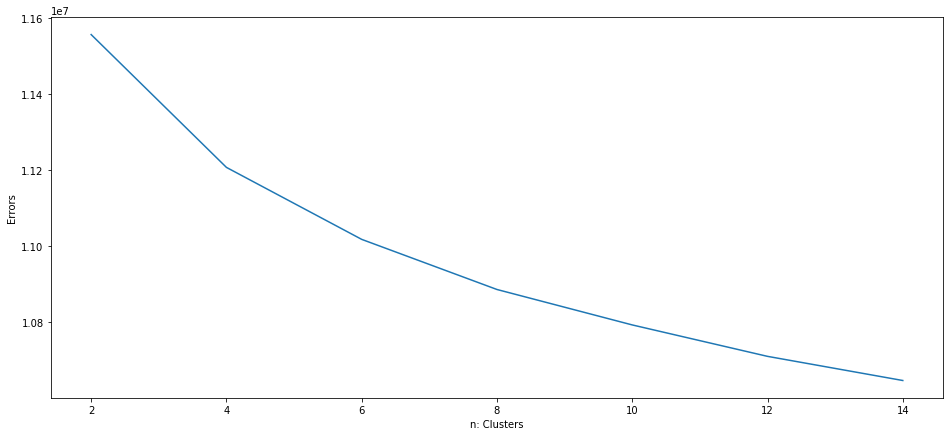

In [0]:
import matplotlib.pyplot as plt

plt.figure( figsize=(16,7) ) 
plt.plot( n, inertia )
plt.xlabel('n: Clusters')
plt.ylabel('Errors')
plt.show()

In [0]:
best_k = 4

km = KMeans(n_clusters = best_k, random_state=0)
km.fit(X_tr1)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=4, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=0, tol=0.0001, verbose=0)

In [0]:
essays = X_train['essays'].values

cluster1 = []
cluster2 = []
cluster3 = []
cluster4 = []

for i in range(km.labels_.shape[0]):
    if km.labels_[i] == 0:
        cluster1.append(essays[i])
    elif km.labels_[i] == 1:
        cluster2.append(essays[i])
    elif km.labels_[i] == 2:
        cluster3.append(essays[i])
    elif  km.labels_[i] == 3:
        cluster4.append(essays[i])


Cluster 1

In [0]:

from wordcloud import WordCloud
text=''
for i in cluster1:
    text+=str(i)

textcl = WordCloud(background_color="black").generate(text)

# Visualizing image:
plt.title('Cluster 1', size=30)
plt.imshow(textcl)
plt.axis("off")
plt.show()

*Cluster* 2

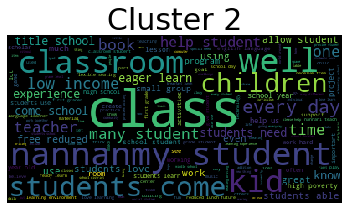

In [0]:

from wordcloud import WordCloud
text=''
for i in cluster2:
    text+=str(i)

textcl = WordCloud(background_color="black").generate(text)

# Visualizing image:
plt.title('Cluster 2', size=30)
plt.imshow(textcl)
plt.axis("off")
plt.show()

Cluster 3

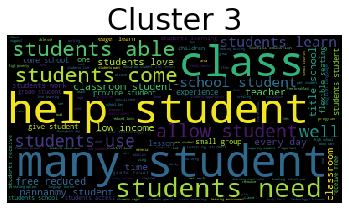

In [0]:

from wordcloud import WordCloud
text=''
for i in cluster3:
    text+=str(i)

textcl = WordCloud(background_color="black").generate(text)

# Visualizing image:
plt.title('Cluster 3', size=30)
plt.imshow(textcl)
plt.axis("off")
plt.show()

Cluster 4

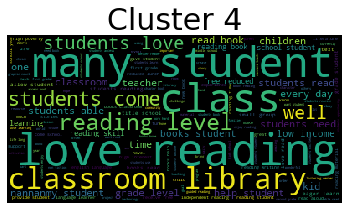

In [0]:

from wordcloud import WordCloud
text=''
for i in cluster4:
    text+=str(i)

textcl = WordCloud(background_color="black").generate(text)

# Visualizing image:
plt.title('Cluster 4', size=30)
plt.imshow(textcl)
plt.axis("off")
plt.show()

<h2>2.6 Apply AgglomerativeClustering</h2>

In [0]:
# Now here we will compute for K= 2 and K=5 values as we haven't used those values for K means clustering.

#Taking 5K data points
X_tr1= X_tr1[:5000]
X_train= X_train[:5000]
X_tr1.shape

(5000, 5000)

## for k=2

In [0]:
from sklearn.cluster import AgglomerativeClustering
X_tr1_arr = X_tr1.toarray()
aggl_cl=AgglomerativeClustering(n_clusters=2).fit(X_tr1_arr)

In [0]:
cluster1=[]
cluster2=[]
essays = X_train['essays'].values
for i in range(aggl_cl.labels_.shape[0]):
    if aggl_cl.labels_[i] == 0:
        cluster1.append(essays[i])
    elif aggl_cl.labels_[i] == 1:
        cluster2.append(essays[i])

    

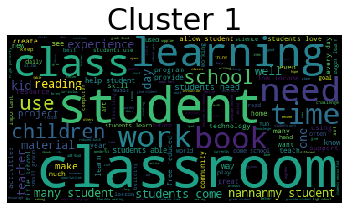

In [0]:
#cluster 1
text=''
for i in cluster1:
    text+=str(i)
from wordcloud import WordCloud
textcl = WordCloud(background_color="black").generate(text)

# Visualizing image:
plt.title('Cluster 1', size=30)
plt.imshow(textcl)
plt.axis("off")
plt.show()

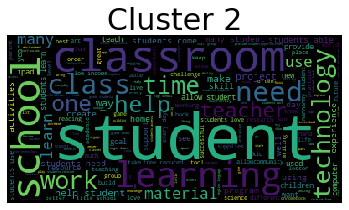

In [0]:
#cluster 2
text=''
for i in cluster2:
    text+=str(i)
from wordcloud import WordCloud
textcl = WordCloud(background_color="black").generate(text)

# Visualizing image:
plt.title('Cluster 2', size=30)
plt.imshow(textcl)
plt.axis("off")
plt.show()

## for k=5

In [0]:
from sklearn.cluster import AgglomerativeClustering

aggl_cl=AgglomerativeClustering(n_clusters=5).fit(X_tr1_arr)

In [0]:
cluster1=[]
cluster2=[]
cluster3=[]
cluster4=[]
cluster5=[]
essays = X_train['essays'].values
for i in range(aggl_cl.labels_.shape[0]):
    if aggl_cl.labels_[i] == 0:
        cluster1.append(essays[i])
    elif aggl_cl.labels_[i] == 1:
        cluster2.append(essays[i])
    elif aggl_cl.labels_[i] == 2:
        cluster3.append(essays[i])
    elif  aggl_cl.labels_[i] == 3:
        cluster4.append(essays[i])
    elif  aggl_cl.labels_[i] == 4:
        cluster5.append(essays[i])

    

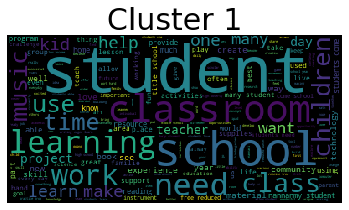

In [0]:
#cluster 1
text=''
for i in cluster1:
    text+=str(i)
from wordcloud import WordCloud
textcl = WordCloud(background_color="black").generate(text)

# Visualizing image:
plt.title('Cluster 1', size=30)
plt.imshow(textcl)
plt.axis("off")
plt.show()

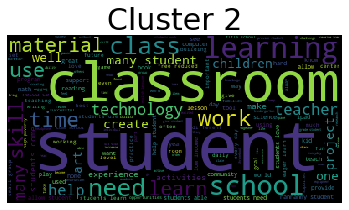

In [0]:
#cluster 2
text=''
for i in cluster2:
    text+=str(i)
from wordcloud import WordCloud
textcl = WordCloud(background_color="black").generate(text)

# Visualizing image:
plt.title('Cluster 2', size=30)
plt.imshow(textcl)
plt.axis("off")
plt.show()

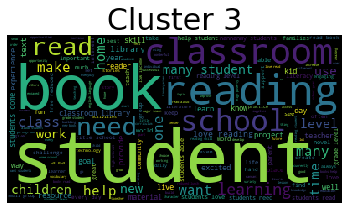

In [0]:
#cluster 3
text=''
for i in cluster3:
    text+=str(i)
from wordcloud import WordCloud
textcl = WordCloud(background_color="black").generate(text)

# Visualizing image:
plt.title('Cluster 3', size=30)
plt.imshow(textcl)
plt.axis("off")
plt.show()

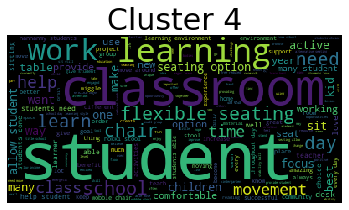

In [0]:
#cluster 4
text=''
for i in cluster4:
    text+=str(i)
from wordcloud import WordCloud
textcl = WordCloud(background_color="black").generate(text)

# Visualizing image:
plt.title('Cluster 4', size=30)
plt.imshow(textcl)
plt.axis("off")
plt.show()

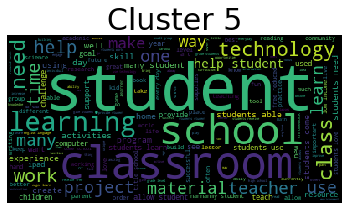

In [0]:
#cluster 5
text=''
for i in cluster5:
    text+=str(i)
from wordcloud import WordCloud
textcl = WordCloud(background_color="black").generate(text)

# Visualizing image:
plt.title('Cluster 5', size=30)
plt.imshow(textcl)
plt.axis("off")
plt.show()

<h2>2.7 Apply DBSCAN</h2>

In [0]:
from sklearn.neighbors import NearestNeighbors

n = 15
knn = NearestNeighbors( n_neighbors = n )
knn.fit( X_tr1 )

distances, indices = knn.kneighbors( X_tr1 )

dist = sorted( distances[ :, n-1 ], reverse=True )

In [0]:
print( distances.shape )

(5000, 15)


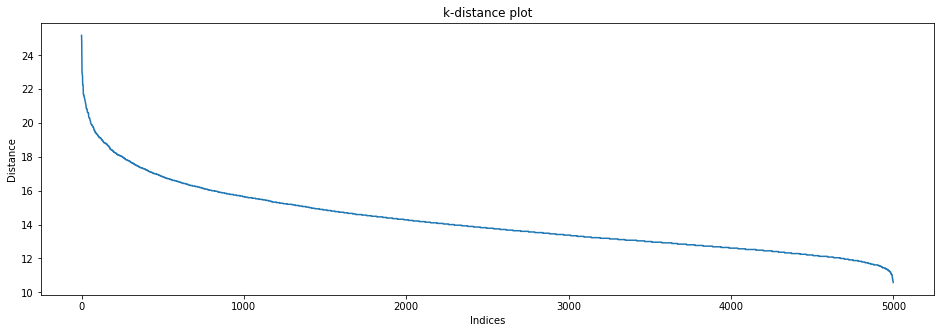

In [0]:
plt.figure( figsize=(16,5))
plt.plot( indices[:,0], dist )
plt.ylabel('Distance')
plt.xlabel('Indices')
plt.title('k-distance plot')
plt.show()

In [0]:
from sklearn.cluster import DBSCAN

dbscn = DBSCAN( eps=18 )
dbscn.fit( X_tr1 )

# eps (float) : The max dist bw two samples for one to be considered as in the neighborhood of the other. 
# This is not a maximum bound on the distances of points within a cluster. 
# This is the most important DBSCAN parameter to choose appropriately for your data set and distance function.

DBSCAN(algorithm='auto', eps=18, leaf_size=30, metric='euclidean',
       metric_params=None, min_samples=5, n_jobs=None, p=None)

In [0]:
label_dbscn = set(dbscn.labels_)
label_dbscn

{-1, 0}

In [0]:
clusterSet = { i: np.where( dbscn.labels_ == i )[0] for i in range(-1,1)}
clusterText = dict()

In [0]:
clusterSet

{-1: array([  35,  191,  246,  269,  276,  311,  313,  316,  457,  484,  577,
         612,  717,  750,  776,  811,  817,  886,  969, 1040, 1042, 1194,
        1203, 1257, 1258, 1342, 1348, 1362, 1383, 1419, 1458, 1524, 1549,
        1650, 1683, 1686, 1707, 1754, 1756, 1803, 1828, 1865, 1908, 1947,
        1975, 1976, 2048, 2083, 2091, 2325, 2332, 2379, 2451, 2617, 2637,
        2642, 2648, 2658, 2661, 2678, 2682, 2728, 2855, 2979, 3015, 3029,
        3050, 3075, 3076, 3092, 3142, 3143, 3154, 3260, 3288, 3320, 3325,
        3355, 3371, 3389, 3412, 3429, 3454, 3455, 3494, 3496, 3529, 3566,
        3586, 3666, 3669, 3762, 3844, 3913, 3939, 4077, 4081, 4099, 4228,
        4234, 4252, 4254, 4296, 4309, 4397, 4406, 4473, 4488, 4505, 4550,
        4589, 4593, 4753, 4760, 4798, 4799, 4852, 4972]),
 0: array([   0,    1,    2, ..., 4997, 4998, 4999])}

In [0]:
from wordcloud import WordCloud

for i in clusterSet:
    for j in clusterSet[i]:
        clusterText[i] = clusterText.get(i, '') + X_train['essays']
        
for i in range( -1,1 ):
   
    # Create and generate a word cloud image:
    wordcloud = WordCloud( background_color='black', width=1400, height=600 ).generate( clusterText[i] )

    # Display the generated image:
    fig = plt.figure( figsize=(25,20) )
    plt.imshow( wordcloud )
    plt.title(f' Cluster {i}', size=30)
    plt.axis('off')
    plt.show()

plt.show()

<h1>3. Conclusions</h1>
<br> Please write down few lines of your observations on this assignment.

# 1.K-Means:

1.First i hyperparameter tuned K_values with 2,4,6,8,10,12,14 and found using the elbow point at k=4.

2.Then trained K-Means with K_value=4

3.After training I clustered the essays into 4 seperate clusters and visualized using worcloud


# 2.Agglomerative:

1.At First I reduced the dimentions to {5000,5000} in K-Means.

2.Then i applied Agglomerative clustering on k=2 initially(randomly choosen).

3.Then clustered the essays into k=2 seperate clusters.

4.After that, visualized using wordcloud for each of the clusters.

5.Then i applied Agglomerative clustering on k=6 finally(again random). 

6.Then i clustered the essays into k=5 seperate clusters.

7.After that i visualized using wordcloud for each of the clusters.

# 3.DBScan:

1.First i converted the reduced sparce matrix to dense using toarray()


2.Then i computed euclidean distance for every point to every other point and took the distance of min_pts

3.Obtained the best eps to be 18 from the above graph b/w dist and points

4.Then formed clusters on noise points and non-noise points 

5.Printed the essays in each of the two clusters 

6.Then printed the wordcloud.

In [0]:
from prettytable import PrettyTable
    
x = PrettyTable()


x.field_names = [" Vectorizer ", " Clustering ", " Hyperparameter "]

x.add_row( [  " B.O.W ", " K Means Clustering ", " n_clusters : 4 " ] ) 
x.add_row( [  " B.O.W ", " Aglomerative  ", " n_clusters : 2,5 "] )
x.add_row( [  " B.O.W ", " DBSCAN ", " eps = 18  "] )
 
print( x )

# Ref : http://zetcode.com/python/prettytable/

+--------------+----------------------+--------------------+
|  Vectorizer  |      Clustering      |   Hyperparameter   |
+--------------+----------------------+--------------------+
|    B.O.W     |  K Means Clustering  |   n_clusters : 4   |
|    B.O.W     |    Aglomerative      |  n_clusters : 2,5  |
|    B.O.W     |        DBSCAN        |     eps = 18       |
+--------------+----------------------+--------------------+
